In [2]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.models import Model

In [3]:
# Paths to your dataset directories
train_data_dir = '/Users/hardikchhipa/Desktop/DR-Arvind/Binary Classification on Retina/dataset/'

# ImageDataGenerator for data augmentation and rescaling
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalization
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # Splitting 20% of the data for validation
)

# Training set
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(224, 224),  # Resize images to fit ResNet50 input
    batch_size=32,
    class_mode='binary',  # Binary classification
    subset='training'  # 80% of the data used for training
)

# Validation set
validation_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(224, 224),  # Resize images to fit ResNet50 input
    batch_size=32,
    class_mode='binary',  # Binary classification
    subset='validation'  # 20% of the data used for validation
)

Found 6069 images belonging to 2 classes.
Found 1516 images belonging to 2 classes.


In [4]:
# Load the pre-trained ResNet50 model without the top classification layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add custom layers on top of ResNet50
x = Flatten()(base_model.output)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(1, activation='sigmoid')(x)  # Binary classification output (0 or 1)

# Define the complete model
model = Model(inputs=base_model.input, outputs=output)

# Freeze the layers of the base ResNet50 model (so they don't get trained)
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary to see the architecture
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 230, 230,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 56, 56,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 56, 56,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 56, 56,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 56, 56,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 56, 56,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 56, 56,    │      1,024 │ conv2_block1_3_c

 Total params: 36,433,025 (138.98 MB)

 Trainable params: 12,845,313 (49.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [5]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=25 
)

# Save the model after training
model.save('resnet50_retina_classifier.h5')

Epoch 1/25


/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
2024-09-14 10:42:32.927536: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 7 of 8
2024-09-14 10:42:34.272852: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


189/189 ━━━━━━━━━━━━━━━━━━━━ 728s 4s/step - accuracy: 0.6668 - loss: 1.1279 - val_accuracy: 0.9422 - val_loss: 0.3566
Epoch 2/25
  1/189 ━━━━━━━━━━━━━━━━━━━━ 7:58 3s/step - accuracy: 0.7500 - loss: 0.4456

2024-09-14 10:54:29.294334: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/opt/anaconda3/lib/python3.12/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


189/189 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.7500 - loss: 0.4456 - val_accuracy: 1.0000 - val_loss: 0.4261
Epoch 3/25


2024-09-14 10:54:30.271037: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


189/189 ━━━━━━━━━━━━━━━━━━━━ 723s 4s/step - accuracy: 0.8263 - loss: 0.4305 - val_accuracy: 0.9707 - val_loss: 0.3086
Epoch 4/25
189/189 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8750 - loss: 0.4231 - val_accuracy: 0.8333 - val_loss: 0.4841
Epoch 5/25


2024-09-14 11:06:36.729086: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-09-14 11:06:48.477610: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 7 of 8
2024-09-14 11:06:50.078468: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


189/189 ━━━━━━━━━━━━━━━━━━━━ 715s 4s/step - accuracy: 0.8320 - loss: 0.4172 - val_accuracy: 0.9694 - val_loss: 0.2845
Epoch 6/25
189/189 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8750 - loss: 0.4296 - val_accuracy: 0.9167 - val_loss: 0.1910
Epoch 7/25
189/189 ━━━━━━━━━━━━━━━━━━━━ 713s 4s/step - accuracy: 0.8399 - loss: 0.3898 - val_accuracy: 0.9102 - val_loss: 0.3226
Epoch 8/25
189/189 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8750 - loss: 0.4441 - val_accuracy: 0.9167 - val_loss: 0.3264
Epoch 9/25


2024-09-14 11:30:32.652631: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-09-14 11:30:44.537181: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 7 of 8
2024-09-14 11:30:46.454104: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


189/189 ━━━━━━━━━━━━━━━━━━━━ 725s 4s/step - accuracy: 0.8428 - loss: 0.3861 - val_accuracy: 0.9601 - val_loss: 0.2581
Epoch 10/25
189/189 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9375 - loss: 0.2984 - val_accuracy: 1.0000 - val_loss: 0.2430
Epoch 11/25


2024-09-14 11:42:52.324483: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 7 of 8
2024-09-14 11:42:53.996899: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


189/189 ━━━━━━━━━━━━━━━━━━━━ 714s 4s/step - accuracy: 0.8491 - loss: 0.3648 - val_accuracy: 0.9674 - val_loss: 0.2388
Epoch 12/25
189/189 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7500 - loss: 0.4491 - val_accuracy: 1.0000 - val_loss: 0.1596
Epoch 13/25


2024-09-14 11:54:49.942189: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 7 of 8
2024-09-14 11:54:50.995108: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


189/189 ━━━━━━━━━━━━━━━━━━━━ 722s 4s/step - accuracy: 0.8599 - loss: 0.3517 - val_accuracy: 0.9707 - val_loss: 0.2136
Epoch 14/25
189/189 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8750 - loss: 0.3752 - val_accuracy: 1.0000 - val_loss: 0.2741
Epoch 15/25


2024-09-14 12:06:54.505494: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 7 of 8
2024-09-14 12:06:56.400351: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


189/189 ━━━━━━━━━━━━━━━━━━━━ 712s 4s/step - accuracy: 0.8421 - loss: 0.3715 - val_accuracy: 0.9787 - val_loss: 0.1966
Epoch 16/25
189/189 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9062 - loss: 0.2591 - val_accuracy: 1.0000 - val_loss: 0.2672
Epoch 17/25


2024-09-14 12:18:39.475361: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-09-14 12:18:50.447488: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 7 of 8
2024-09-14 12:18:51.941805: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


189/189 ━━━━━━━━━━━━━━━━━━━━ 711s 4s/step - accuracy: 0.8515 - loss: 0.3522 - val_accuracy: 0.9847 - val_loss: 0.1777
Epoch 18/25
189/189 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8750 - loss: 0.3022 - val_accuracy: 1.0000 - val_loss: 0.1162
Epoch 19/25


2024-09-14 12:30:45.478426: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 7 of 8
2024-09-14 12:30:47.322527: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


189/189 ━━━━━━━━━━━━━━━━━━━━ 758s 4s/step - accuracy: 0.8422 - loss: 0.3637 - val_accuracy: 0.9787 - val_loss: 0.1811
Epoch 20/25
189/189 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9062 - loss: 0.2779 - val_accuracy: 1.0000 - val_loss: 0.2363
Epoch 21/25


2024-09-14 12:43:28.695824: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 7 of 8
2024-09-14 12:43:30.112805: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


189/189 ━━━━━━━━━━━━━━━━━━━━ 873s 5s/step - accuracy: 0.8389 - loss: 0.3655 - val_accuracy: 0.9774 - val_loss: 0.1806
Epoch 22/25
189/189 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7812 - loss: 0.4829 - val_accuracy: 0.7500 - val_loss: 0.4937
Epoch 23/25


2024-09-14 12:58:05.459955: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 7 of 8
2024-09-14 12:58:06.995764: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


189/189 ━━━━━━━━━━━━━━━━━━━━ 862s 5s/step - accuracy: 0.8490 - loss: 0.3481 - val_accuracy: 0.9801 - val_loss: 0.1735
Epoch 24/25
189/189 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8750 - loss: 0.3281 - val_accuracy: 1.0000 - val_loss: 0.1483
Epoch 25/25


2024-09-14 13:12:31.907175: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:2: Filling up shuffle buffer (this may take a while): 6 of 8
2024-09-14 13:12:35.102151: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


189/189 ━━━━━━━━━━━━━━━━━━━━ 859s 4s/step - accuracy: 0.8457 - loss: 0.3550 - val_accuracy: 0.9701 - val_loss: 0.1786


In [6]:
# Evaluate the model on the validation data
val_loss, val_accuracy = model.evaluate(validation_generator)
print(f'Validation Accuracy: {val_accuracy * 100:.2f}%')

48/48 ━━━━━━━━━━━━━━━━━━━━ 217s 5s/step - accuracy: 0.9706 - loss: 0.1751
Validation Accuracy: 97.23%


48/48 ━━━━━━━━━━━━━━━━━━━━ 165s 3s/step
[[382 402]
 [366 366]]
              precision    recall  f1-score   support

           0       0.51      0.49      0.50       784
           1       0.48      0.50      0.49       732

    accuracy                           0.49      1516
   macro avg       0.49      0.49      0.49      1516
weighted avg       0.49      0.49      0.49      1516



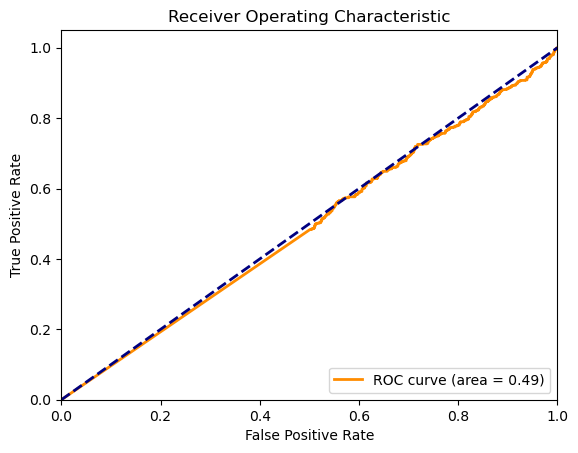

In [7]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt

# Get the true labels and predictions
Y_pred = model.predict(validation_generator)
y_pred = np.round(Y_pred).astype(int).flatten()
y_true = validation_generator.classes

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
print(cm)
print(classification_report(y_true, y_pred))

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_true, Y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step


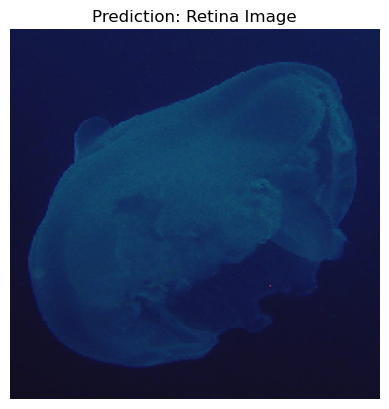

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model('retina_non_retina_classifier.h5')

# Function to load and preprocess the image
def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    return img, img_array

# Function to make predictions
def predict_image(img_array):
    prediction = model.predict(img_array)
    return np.round(prediction[0][0])

# Function to display the image with the prediction
def display_image_and_prediction(img_path):
    # Load and preprocess image
    img, img_array = load_and_preprocess_image(img_path)
    
    # Make a prediction
    prediction = predict_image(img_array)
    
    # Display the image
    plt.imshow(img)
    plt.axis('off')  # Turn off axis labels
    label = "Retina Image" if prediction == 1 else "Non-Retina Image"
    plt.title(f"Prediction: {label}")
    
    # Show the image and prediction result
    plt.show()

# Path to the image you want to test
img_path = '/Users/hardikchhipa/Desktop/DR-Arvind/Binary Classification on Retina/dataset/non-dr/ILSVRC2012_val_00000063.JPEG'

# Call the function to display the image and prediction
display_image_and_prediction(img_path)

# Fine tuning the same Model

In [15]:
# Unfreeze some layers in the base model for fine-tuning
for layer in base_model.layers[-10:]:  # Unfreeze the last 10 layers
    layer.trainable = True

# Recompile the model with a lower learning rate for fine-tuning
model.compile(optimizer=tf.keras.optimizers.Adam(1e-5), loss='binary_crossentropy', metrics=['accuracy'])

# Fine-tune the model
history_finetune = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=10  # Fine-tune for fewer epochs
)

# Save the fine-tuned model
model.save('resnet50_retina_classifier_finetuned.h5')

Epoch 1/10


2024-09-14 14:21:39.910363: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:143: Filling up shuffle buffer (this may take a while): 7 of 8
2024-09-14 14:21:41.309144: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


189/189 ━━━━━━━━━━━━━━━━━━━━ 600s 3s/step - accuracy: 0.9975 - loss: 0.0082 - val_accuracy: 0.9960 - val_loss: 0.0195
Epoch 2/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 1s 568us/step - accuracy: 1.0000 - loss: 7.7247e-05 - val_accuracy: 1.0000 - val_loss: 1.1932e-07
Epoch 3/10


/opt/anaconda3/lib/python3.12/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)
2024-09-14 14:31:38.600291: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:143: Filling up shuffle buffer (this may take a while): 7 of 8
2024-09-14 14:31:40.166021: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


189/189 ━━━━━━━━━━━━━━━━━━━━ 518s 3s/step - accuracy: 0.9987 - loss: 0.0071 - val_accuracy: 0.9980 - val_loss: 0.0105
Epoch 4/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 2s 995us/step - accuracy: 1.0000 - loss: 5.9440e-06 - val_accuracy: 1.0000 - val_loss: 7.1230e-05
Epoch 5/10


2024-09-14 14:40:18.629691: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:143: Filling up shuffle buffer (this may take a while): 7 of 8
2024-09-14 14:40:20.023254: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


189/189 ━━━━━━━━━━━━━━━━━━━━ 476s 2s/step - accuracy: 0.9982 - loss: 0.0066 - val_accuracy: 0.9973 - val_loss: 0.0113
Epoch 6/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 1s 869us/step - accuracy: 1.0000 - loss: 7.3518e-05 - val_accuracy: 1.0000 - val_loss: 1.3307e-07
Epoch 7/10


2024-09-14 14:48:16.337203: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:143: Filling up shuffle buffer (this may take a while): 7 of 8
2024-09-14 14:48:17.437423: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


189/189 ━━━━━━━━━━━━━━━━━━━━ 481s 2s/step - accuracy: 0.9983 - loss: 0.0030 - val_accuracy: 0.9993 - val_loss: 0.0018
Epoch 8/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 1s 778us/step - accuracy: 1.0000 - loss: 1.5277e-04 - val_accuracy: 1.0000 - val_loss: 2.1155e-07
Epoch 9/10


2024-09-14 14:56:06.784455: I tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-09-14 14:56:17.498612: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:450] ShuffleDatasetV3:143: Filling up shuffle buffer (this may take a while): 7 of 8
2024-09-14 14:56:18.852342: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:480] Shuffle buffer filled.


189/189 ━━━━━━━━━━━━━━━━━━━━ 484s 3s/step - accuracy: 0.9992 - loss: 0.0040 - val_accuracy: 0.9973 - val_loss: 0.0092
Epoch 10/10
189/189 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 1.0000 - loss: 1.1150e-04 - val_accuracy: 0.9167 - val_loss: 0.1523


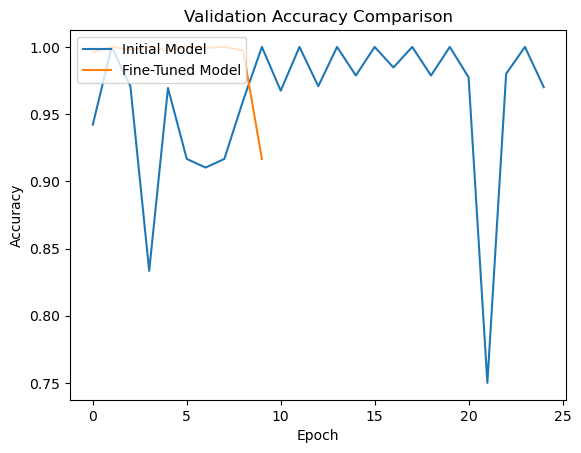

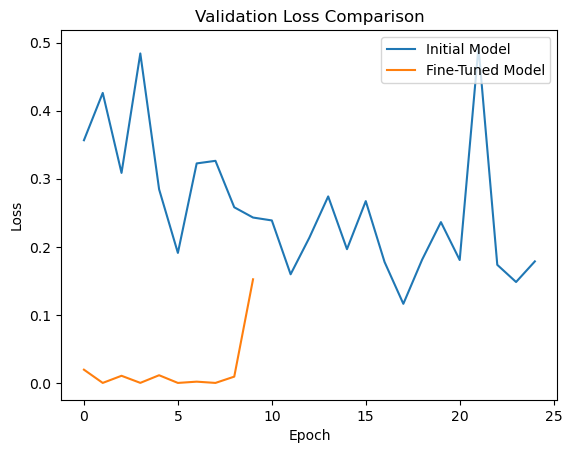

In [17]:
import matplotlib.pyplot as plt

# Assume we have the history from both the initial model and the fine-tuned model
history_initial = history  # Replace with the history of the initial model
history_finetuned = history_finetune  # Replace with the fine-tuned model history

# Plot accuracy comparison
plt.plot(history_initial.history['val_accuracy'], label='Initial Model')
plt.plot(history_finetuned.history['val_accuracy'], label='Fine-Tuned Model')
plt.title('Validation Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

# Plot loss comparison
plt.plot(history_initial.history['val_loss'], label='Initial Model')
plt.plot(history_finetuned.history['val_loss'], label='Fine-Tuned Model')
plt.title('Validation Loss Comparison')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()


In [19]:
from sklearn.metrics import confusion_matrix, classification_report

# Predictions from the fine-tuned model
y_pred = np.round(model.predict(validation_generator)).astype(int).flatten()

# Ground truth
y_true = validation_generator.classes

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(cm)

# Classification report
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=['Non-Retina', 'Retina']))

48/48 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step
Confusion Matrix:
[[397 387]
 [383 349]]
Classification Report:
              precision    recall  f1-score   support

  Non-Retina       0.51      0.51      0.51       784
      Retina       0.47      0.48      0.48       732

    accuracy                           0.49      1516
   macro avg       0.49      0.49      0.49      1516
weighted avg       0.49      0.49      0.49      1516



48/48 ━━━━━━━━━━━━━━━━━━━━ 82s 2s/step
48/48 ━━━━━━━━━━━━━━━━━━━━ 86s 2s/step


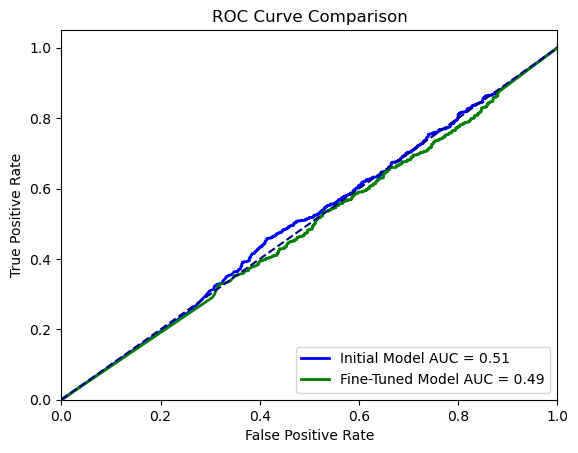

In [22]:
from sklearn.metrics import roc_curve, auc

# Generate ROC curve for initial model
y_pred_initial = model.predict(validation_generator)
fpr_initial, tpr_initial, _ = roc_curve(y_true, y_pred_initial)
roc_auc_initial = auc(fpr_initial, tpr_initial)

# Generate ROC curve for fine-tuned model
y_pred_finetuned = model.predict(validation_generator)
fpr_finetuned, tpr_finetuned, _ = roc_curve(y_true, y_pred_finetuned)
roc_auc_finetuned = auc(fpr_finetuned, tpr_finetuned)

# Plot both ROC curves
plt.figure()
plt.plot(fpr_initial, tpr_initial, color='blue', lw=2, label=f'Initial Model AUC = {roc_auc_initial:.2f}')
plt.plot(fpr_finetuned, tpr_finetuned, color='green', lw=2, label=f'Fine-Tuned Model AUC = {roc_auc_finetuned:.2f}')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc="lower right")
plt.show()


# Error Analysis

### Code to Display Misclassified Images:

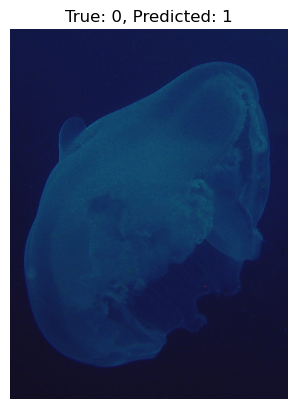

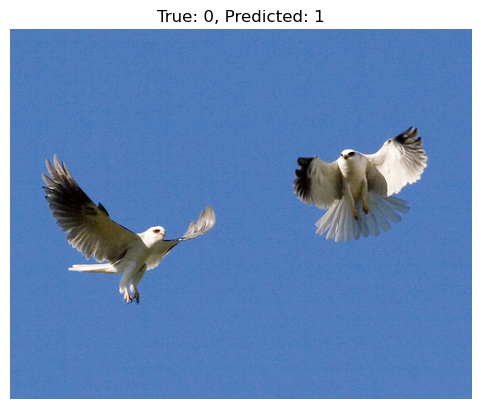

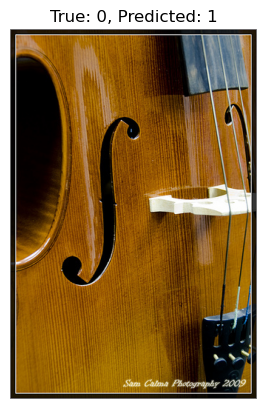

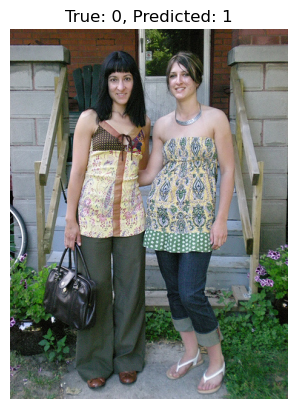

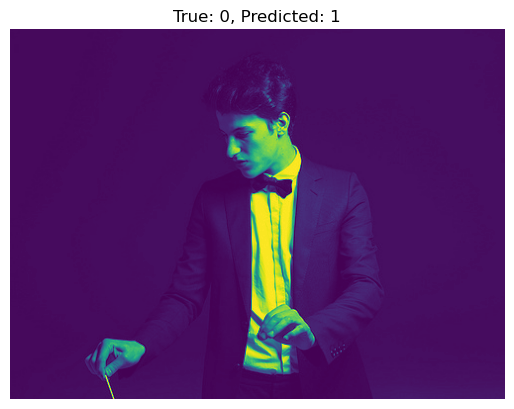

In [43]:
import numpy as np
import matplotlib.pyplot as plt

# Get the misclassified indices
misclassified_indices = np.where(y_pred != y_true)[0]

# Display the first 5 misclassified images
for i, idx in enumerate(misclassified_indices[:5]):
    img_path = validation_generator.filepaths[idx]
    img = plt.imread(img_path)
    plt.imshow(img)
    plt.title(f"True: {y_true[idx]}, Predicted: {y_pred[idx]}")
    plt.axis('off')
    plt.show()

In [36]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,507,269 (127.82 MB)

 Trainable params: 11,169,089 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 22,338,180 (85.21 MB)

In [38]:
print(model)  # If you named it this
print(base_model)        # If it's the base model

<Sequential name=sequential, built=True>
<Functional name=resnet50, built=True>


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step


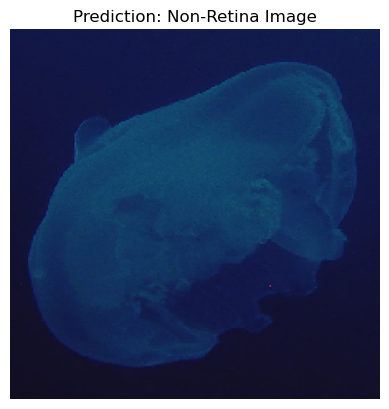

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

# Load the trained model
model = load_model('resnet50_retina_classifier_finetuned.h5')

# Function to load and preprocess the image
def load_and_preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    return img, img_array

# Function to make predictions
def predict_image(img_array):
    prediction = model.predict(img_array)
    return np.round(prediction[0][0])

# Function to display the image with the prediction
def display_image_and_prediction(img_path):
    # Load and preprocess image
    img, img_array = load_and_preprocess_image(img_path)
    
    # Make a prediction
    prediction = predict_image(img_array)
    
    # Display the image
    plt.imshow(img)
    plt.axis('off')  # Turn off axis labels
    label = "Retina Image" if prediction == 1 else "Non-Retina Image"
    plt.title(f"Prediction: {label}")
    
    # Show the image and prediction result
    plt.show()

# Path to the image you want to test
img_path = '/Users/hardikchhipa/Desktop/DR-Arvind/Binary Classification on Retina/dataset/non-dr/ILSVRC2012_val_00000063.JPEG'

# Call the function to display the image and prediction
display_image_and_prediction(img_path)